### Projet PACTE 4A-IIIA: Data Science Formula 1 World  Championship
#### Sujet: Quels sont les facteurs déterminants pour qu’un pilote ou une équipe atteigne la première place dans le championnat de Formule 1 ?

In [3]:
import pandas as pd

#### 1. Chargement des données

In [4]:
circuits = pd.read_csv("./dataset/circuits.csv")
constructor_results = pd.read_csv("./dataset/constructor_results.csv")
constructor_standings = pd.read_csv("./dataset/constructor_standings.csv")
constructors = pd.read_csv("./dataset/constructors.csv")
driver_standings = pd.read_csv("./dataset/driver_standings.csv")
drivers = pd.read_csv("./dataset/drivers.csv")
lap_times = pd.read_csv("./dataset/lap_times.csv")
pit_stops = pd.read_csv("./dataset/pit_stops.csv")
qualifying = pd.read_csv("./dataset/qualifying.csv")
races = pd.read_csv("./dataset/races.csv")
results = pd.read_csv("./dataset/results.csv")
seasons = pd.read_csv("./dataset/seasons.csv")
sprint_results = pd.read_csv("./dataset/sprint_results.csv")
status = pd.read_csv("./dataset/status.csv")

##### Verification de chargement

In [5]:
# Vérification des datasets importés
datasets = {
    "circuits": circuits,
    "constructor_results": constructor_results,
    "constructor_standings": constructor_standings,
    "constructors": constructors,
    "driver_standings": driver_standings,
    "drivers": drivers,
    "lap_times": lap_times,
    "pit_stops": pit_stops,
    "qualifying": qualifying,
    "races": races,
    "results": results,
    "seasons": seasons,
    "sprint_results": sprint_results,
    "status": status
}

for name, df in datasets.items():
    print(f"{name}: {df.shape[0]} lignes, {df.shape[1]} colonnes")

circuits: 77 lignes, 9 colonnes
constructor_results: 12505 lignes, 5 colonnes
constructor_standings: 13271 lignes, 7 colonnes
constructors: 212 lignes, 5 colonnes
driver_standings: 34595 lignes, 7 colonnes
drivers: 859 lignes, 9 colonnes
lap_times: 575029 lignes, 6 colonnes
pit_stops: 10990 lignes, 7 colonnes
qualifying: 10254 lignes, 9 colonnes
races: 1125 lignes, 18 colonnes
results: 26519 lignes, 18 colonnes
seasons: 75 lignes, 2 colonnes
sprint_results: 300 lignes, 16 colonnes
status: 139 lignes, 2 colonnes


#### 2. Préparation des données

#### 2.1. Exploration initiale des données
Cette étape permet d’avoir une vue d’ensemble des datasets (colonnes, types de données, valeurs manquantes).

In [6]:
# Afficher les premières lignes et résumés des datasets
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info())
    print(df.head(), "\n")


Dataset: circuits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB
None
   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya     

##### 2.2. Traitement des valeurs manquantes
Les valeurs manquantes peuvent fausser les résultats. On identifie ces valeurs et choisit une stratégie : suppression, imputation, ou autre.

In [7]:
# Vérification des valeurs manquantes
for name, df in datasets.items():
    print(f"{name} - Valeurs manquantes:\n{df.isnull().sum()}\n")

circuits - Valeurs manquantes:
circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

constructor_results - Valeurs manquantes:
constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64

constructor_standings - Valeurs manquantes:
constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

constructors - Valeurs manquantes:
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

driver_standings - Valeurs manquantes:
driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

drivers 

Traitement des valeurs manquantes, nettoyage et conversions

In [13]:
# Nettoyage des données
for name, df in datasets.items():
    print(f"Nettoyage du dataset: {name}")

    # Vérifier et afficher les valeurs manquantes avant nettoyage
    print(f"{name} - Valeurs manquantes avant nettoyage:\n{df.isnull().sum()}\n")
    
    # Traitement des colonnes numériques (remplacement des valeurs manquantes par la moyenne)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))
    
    # Traitement des colonnes catégorielles (remplacement par la modalité la plus fréquente)
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0] if not col.mode().empty else 'NA'))
    
    # Suppression des doublons
    df.drop_duplicates(inplace=True)
    
    # Réinitialisation de l'index
    df.reset_index(drop=True, inplace=True)
    
    # Vérifier et afficher les valeurs manquantes après nettoyage
    print(f"{name} - Valeurs manquantes après nettoyage:\n{df.isnull().sum()}\n")
    print(f"{name} - Taille après nettoyage: {df.shape}\n")

Nettoyage du dataset: circuits
circuits - Valeurs manquantes avant nettoyage:
circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

circuits - Valeurs manquantes après nettoyage:
circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

circuits - Taille après nettoyage: (77, 9)

Nettoyage du dataset: constructor_results
constructor_results - Valeurs manquantes avant nettoyage:
constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64

constructor_results - Valeurs manquantes après nettoyage:
constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64

constructor_results - Taille après nettoyage: (12505, 5)

Nettoyage d

In [17]:
# pour sauvegarder les datasets nettoyés si nécessaire
for name, df in datasets.items():
    df.to_csv(f"./dataset/cleaned_{name}.csv", index=False)

# Vérification du nettoyage

In [19]:
# Vérification du nettoyage
for name, df in datasets.items():
    print(f"Vérification du dataset: {name}")

    # Vérifier qu'il n'y a plus de valeurs manquantes
    missing_values = df.isnull().sum().sum()
    if missing_values == 0:
        print(f"✔ {name} : Pas de valeurs manquantes.")
    else:
        print(f"✘ {name} : Encore {missing_values} valeurs manquantes.\n{df.isnull().sum()}")
    
    # Vérifier les doublons
    duplicates = df.duplicated().sum()
    if duplicates == 0:
        print(f"✔ {name} : Pas de doublons.")
    else:
        print(f"✘ {name} : Encore {duplicates} doublons.")
    
    # Vérifier les dimensions
    print(f"{name} : {df.shape[0]} lignes, {df.shape[1]} colonnes.\n")


Vérification du dataset: circuits
✔ circuits : Pas de valeurs manquantes.
✔ circuits : Pas de doublons.
circuits : 77 lignes, 9 colonnes.

Vérification du dataset: constructor_results
✔ constructor_results : Pas de valeurs manquantes.
✔ constructor_results : Pas de doublons.
constructor_results : 12505 lignes, 5 colonnes.

Vérification du dataset: constructor_standings
✔ constructor_standings : Pas de valeurs manquantes.
✔ constructor_standings : Pas de doublons.
constructor_standings : 13271 lignes, 7 colonnes.

Vérification du dataset: constructors
✔ constructors : Pas de valeurs manquantes.
✔ constructors : Pas de doublons.
constructors : 212 lignes, 5 colonnes.

Vérification du dataset: driver_standings
✔ driver_standings : Pas de valeurs manquantes.
✔ driver_standings : Pas de doublons.
driver_standings : 34595 lignes, 7 colonnes.

Vérification du dataset: drivers
✔ drivers : Pas de valeurs manquantes.
✔ drivers : Pas de doublons.
drivers : 859 lignes, 9 colonnes.

Vérification du

In [21]:
# Fusion des datasets
# Ajouter les détails des courses aux temps par tour
lap_times = lap_times.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

# Ajouter les informations des résultats aux temps par tour
lap_times = lap_times.merge(results[['raceId', 'driverId', 'constructorId', 'positionOrder', 'points', 'laps']], 
                            on=['raceId', 'driverId'], how='left')

# Ajouter les informations des qualifications
qualifying = qualifying.merge(races[['raceId', 'year', 'name']], on='raceId', how='left')

# Exploration rapide des données fusionnées
print("Lap Times shape:", lap_times.shape)
print("Qualifying shape:", qualifying.shape)

Lap Times shape: (575029, 12)
Qualifying shape: (10254, 11)


#### 3. Analyse descriptive des données

##### 3.1. Statistiques descriptives
Fournir des statistiques (moyenne, médiane, écart-type, etc.) pour comprendre la distribution des variables.

In [23]:
# Calculer la moyenne des temps par tour pour chaque pilote dans chaque course
average_lap_times = (
    lap_times.groupby(['raceId', 'driverId', 'constructorId', 'year'])
    .agg(avg_lap_time=('milliseconds', 'mean'), total_laps=('lap', 'max'))
    .reset_index()
)

# Fusion avec les résultats pour ajouter le classement final
driver_performance = average_lap_times.merge(
    results[['raceId', 'driverId', 'positionOrder', 'points']],
    on=['raceId', 'driverId'], how='left'
)

# Ajouter les informations de qualification
driver_performance = driver_performance.merge(
    qualifying[['raceId', 'driverId', 'position']],
    on=['raceId', 'driverId'], how='left'
)

# Afficher un échantillon des données consolidées
print(driver_performance.head())


   raceId  driverId  constructorId  year  avg_lap_time  total_laps  \
0       1         1              1  2009  97563.758621          58   
1       1         2              2  2009  97635.672414          58   
2       1         3              3  2009  97612.172414          58   
3       1         4              4  2009  97597.637931          58   
4       1         6              3  2009  91822.235294          17   

   positionOrder  points  position  
0             20     0.0      15.0  
1             10     0.0      11.0  
2              6     3.0       5.0  
3              5     4.0      12.0  
4             18     0.0      13.0  


In [36]:
#Ajout d'une conversion des millisecondes en secondes
# Calculer la moyenne des temps par tour en secondes pour chaque pilote dans chaque course
average_lap_times = (
    lap_times
    .assign(seconds=lap_times['milliseconds'] / 1000)  # Ajouter une colonne en secondes
    .groupby(['raceId', 'driverId', 'constructorId', 'year'])  # Grouper par course, pilote, constructeur, année
    .agg(avg_lap_time=('seconds', 'mean'), total_laps=('lap', 'max'))  # Moyenne et tours max
    .reset_index()  # Réinitialiser les index pour un DataFrame plat
)

# Afficher le DataFrame des temps moyens par tour
print(average_lap_times.head())


   raceId  driverId  constructorId  year  avg_lap_time  total_laps
0       1         1              1  2009     97.563759          58
1       1         2              2  2009     97.635672          58
2       1         3              3  2009     97.612172          58
3       1         4              4  2009     97.597638          58
4       1         6              3  2009     91.822235          17


Analyse des Facteurs

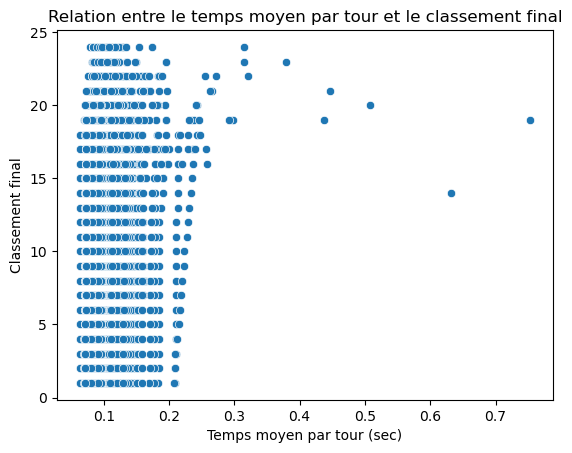

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous que la colonne 'avg_lap_time' est en secondes
driver_performance['avg_lap_time'] = driver_performance['avg_lap_time'] / 1000

# Relation entre le temps moyen par tour (en secondes) et le classement final
sns.scatterplot(data=driver_performance, x='avg_lap_time', y='positionOrder')
plt.title("Relation entre le temps moyen par tour et le classement final")
plt.xlabel("Temps moyen par tour (sec)")
plt.ylabel("Classement final")
plt.show()




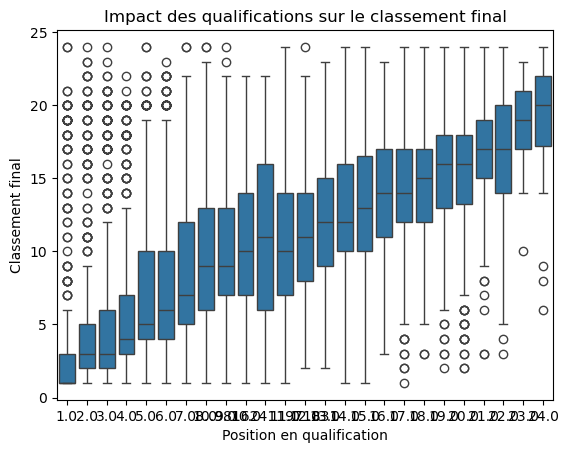

In [48]:
# Relation entre la position de qualification et le classement final
sns.boxplot(data=driver_performance, x='position', y='positionOrder')
plt.title("Impact des qualifications sur le classement final")
plt.xlabel("Position en qualification")
plt.ylabel("Classement final")
plt.show()

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Préparer les données pour le modèle
features = ['avg_lap_time', 'total_laps', 'position']
target = 'positionOrder'

# Remplir les valeurs manquantes
driver_performance = driver_performance.fillna(driver_performance.mean())

X = driver_performance[features]
y = driver_performance[target]

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Erreur quadratique moyenne (RMSE) : {rmse}")

# Importance des caractéristiques
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))


Erreur quadratique moyenne (RMSE) : 3.454229949097467
        Feature  Importance
1    total_laps    0.417711
2      position    0.340148
0  avg_lap_time    0.242141


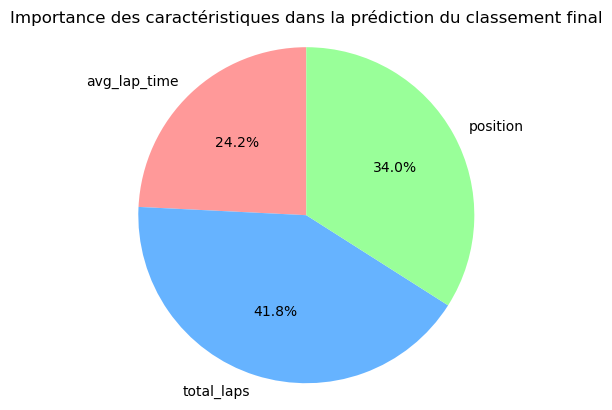

In [52]:
import matplotlib.pyplot as plt

# Création du diagramme de cercle (secteurs)
labels = feature_importances['Feature']
sizes = feature_importances['Importance']

# Couleurs pour chaque secteur
colors = ['#ff9999','#66b3ff','#99ff99']

# Créer le diagramme de cercle
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

# Ajouter un titre
plt.title('Importance des caractéristiques dans la prédiction du classement final')

# Afficher le diagramme
plt.axis('equal')  # Assure que le diagramme est un cercle
plt.show()


On remarque que RMSE de 3.45, indiquant une précision modérée dans la prédiction du classement final. 
Les variables les plus influentes sont le nombre total de tours (41.77%) et la position de qualification (34.01%), tandis que le temps moyen par tour a un impact plus faible (24.21%). 
Cela suggère que la position en qualification et la régularité du pilote sont plus déterminantes que son temps moyen par tour.